In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(palette='bright')

# Read

In [2]:
df = pd.DataFrame(data={
    'MODE': [],
    'n': [],
    'p': [],
    'TIME': [],
})

for m in ['mpi_opencl', 'mpi_serial', 'serial']:
    if m == 'serial':
        for n in os.listdir(f'data/{m}'):
            with open(f'data/{m}/{n}') as f:
                df.loc[len(df)] = [m, int(n), None, float(f.read().strip())]
    else:
        for p in os.listdir(f'data/{m}'):
            for n in os.listdir(f'data/{m}/{p}'):
                with open(f'data/{m}/{p}/{n}') as f:
                    df.loc[len(df)] = [m, int(n), int(p), float(f.read().strip())]

df.head()

,MODE,n,p,TIME
0,mpi_opencl,10000.0,2,0.153637
1,mpi_opencl,1000000.0,2,0.572737
2,mpi_opencl,120000.0,2,0.207474
3,mpi_opencl,150000.0,2,0.263116
4,mpi_opencl,250000.0,2,0.337558


# Times

## Serial

In [3]:
(
    df[df['MODE'] == 'serial'][['n', 'TIME']]
        .sort_values(by='n')
)

,n,TIME
48,10000.0,0.020371
53,40000.0,0.068461
55,80000.0,0.197302
50,120000.0,0.266855
51,150000.0,0.480278
52,250000.0,0.997873
54,500000.0,0.426196
49,1000000.0,4.222140


## MPI + Serial

In [4]:
(
    df[df['MODE'] == 'mpi_serial']
        .pivot(index='p', columns='n', values='TIME')
)

n,10000.0,40000.0,80000.0,120000.0,150000.0,250000.0,500000.0,1000000.0
p,,,,,,,,
2.0,0.027126,0.055096,0.139236,0.178078,0.304075,0.595736,0.349243,2.52147
3.0,0.017105,0.062062,0.120482,0.164076,0.269261,0.551750,0.324369,2.14956
4.0,0.027572,0.055840,0.116444,0.155436,0.251580,0.484686,0.313247,1.98690


## MPI + OpenCL

In [5]:
(
    df[df['MODE'] == 'mpi_opencl']
        .pivot(index='p', columns='n', values='TIME')
)

n,10000.0,40000.0,80000.0,120000.0,150000.0,250000.0,500000.0,1000000.0
p,,,,,,,,
2.0,0.153637,0.197290,0.207259,0.207474,0.263116,0.337558,0.354433,0.572737
3.0,0.197287,0.233788,0.220176,0.247225,0.299879,0.384494,0.397787,0.611933
4.0,0.216370,0.223242,0.239830,0.256614,0.309502,0.437399,0.445989,0.649089


# Plots

## Serial

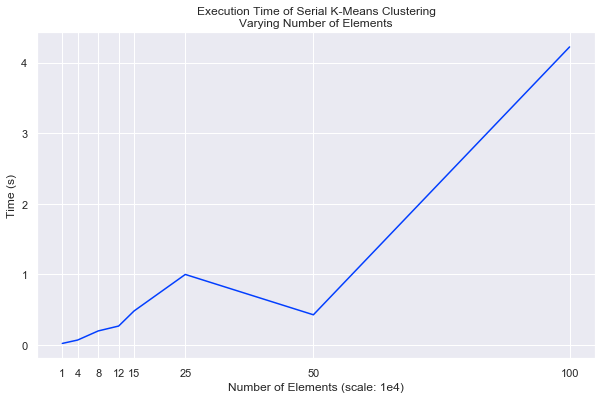

In [6]:
fig, ax = plt.subplots(figsize=[10, 6])

sns.lineplot(
    data=df[df['MODE'] == 'serial'], x='n', y='TIME',
    ax=ax,
)

ax.set_title('Execution Time of Serial K-Means Clustering\nVarying Number of Elements')
ax.set_ylabel('Time (s)')
ax.set_xlabel('Number of Elements (scale: 1e4)')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: int(x / 1e4)))

plt.xticks(df[df['MODE'] == 'serial']['n'].unique())
plt.show()

## MPI + Serial

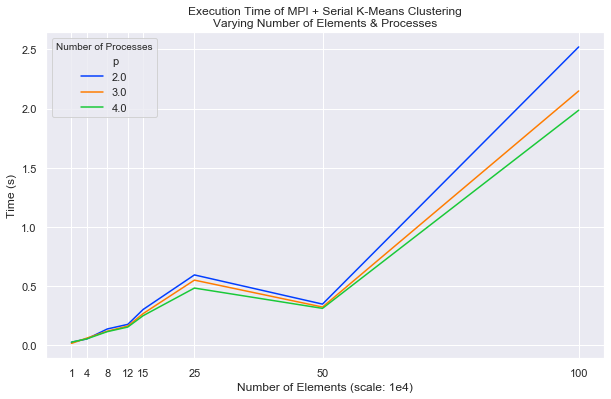

In [7]:
df_ms = df[df['MODE'] == 'mpi_serial']

fig, ax = plt.subplots(figsize=[10, 6])

sns.lineplot(
    data=df_ms, x='n', y='TIME', hue='p',
    palette=sns.color_palette("bright", len(df_ms['p'].unique())),
    ax=ax,
)

ax.set_title('Execution Time of MPI + Serial K-Means Clustering\nVarying Number of Elements & Processes')
ax.set_ylabel('Time (s)')
ax.set_xlabel('Number of Elements (scale: 1e4)')
ax.legend(title='Number of Processes')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: int(x / 1e4)))

plt.xticks(df[df['MODE'] == 'serial']['n'].unique())
plt.show()

## MPI + OpenCL

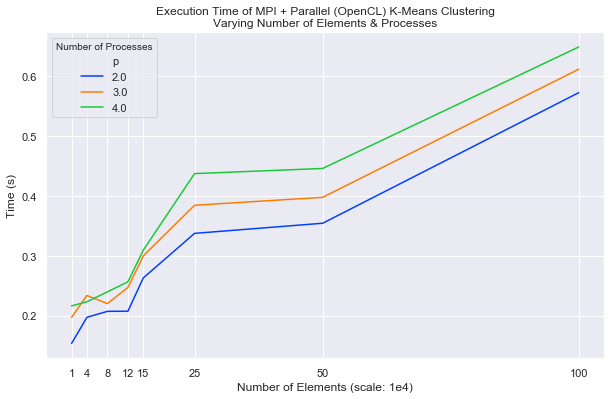

In [8]:
df_mo = df[df['MODE'] == 'mpi_opencl']

fig, ax = plt.subplots(figsize=[10, 6])

sns.lineplot(
    data=df_mo, x='n', y='TIME', hue='p',
    palette=sns.color_palette("bright", len(df_mo['p'].unique())),
    ax=ax,
)

ax.set_title('Execution Time of MPI + Parallel (OpenCL) K-Means Clustering\nVarying Number of Elements & Processes')
ax.set_ylabel('Time (s)')
ax.set_xlabel('Number of Elements (scale: 1e4)')
ax.legend(title='Number of Processes')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: int(x / 1e4)))

plt.xticks(df[df['MODE'] == 'serial']['n'].unique())
plt.show()

# Together

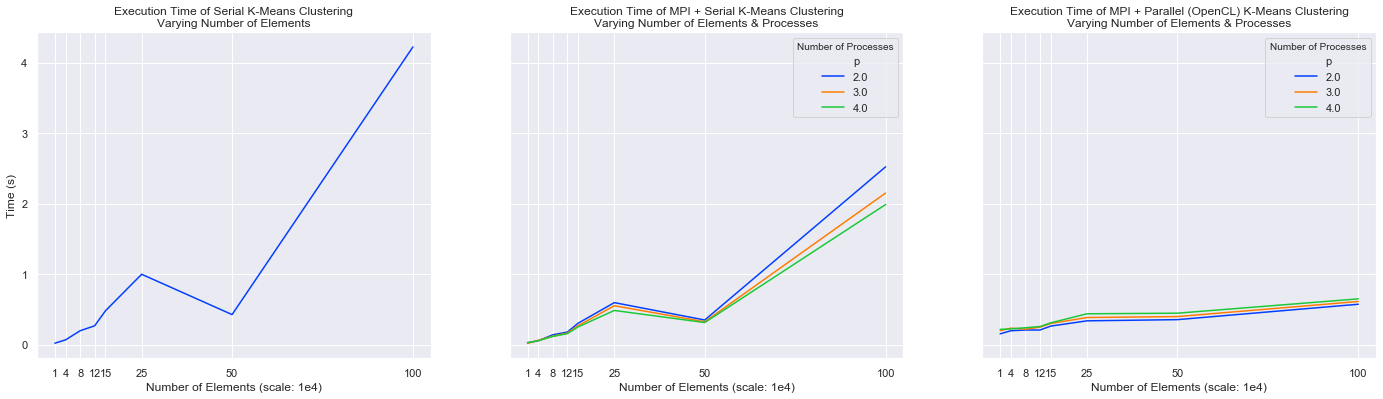

In [9]:
fig, ax = plt.subplots(1, 3, figsize=[24, 6], sharey=True)

sns.lineplot(
    data=df[df['MODE'] == 'serial'], x='n', y='TIME',
    ax=ax[0],
)

sns.lineplot(
    data=df_ms, x='n', y='TIME', hue='p',
    palette=sns.color_palette("bright", len(df_ms['p'].unique())),
    ax=ax[1],
)

sns.lineplot(
    data=df_mo, x='n', y='TIME', hue='p',
    palette=sns.color_palette("bright", len(df_mo['p'].unique())),
    ax=ax[2],
)

ax[0].set_title('Execution Time of Serial K-Means Clustering\nVarying Number of Elements')
ax[0].set_ylabel('Time (s)')
ax[0].set_xlabel('Number of Elements (scale: 1e4)')

ax[1].set_title('Execution Time of MPI + Serial K-Means Clustering\nVarying Number of Elements & Processes')
ax[1].set_ylabel('Time (s)')
ax[1].set_xlabel('Number of Elements (scale: 1e4)')
ax[1].legend(title='Number of Processes')

ax[2].set_title('Execution Time of MPI + Parallel (OpenCL) K-Means Clustering\nVarying Number of Elements & Processes')
ax[2].set_ylabel('Time (s)')
ax[2].set_xlabel('Number of Elements (scale: 1e4)')
ax[2].legend(title='Number of Processes')

for i in range(3):
    ax[i].get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: int(x / 1e4)))
    plt.sca(ax[i])
    plt.xticks(df[df['MODE'] == 'serial']['n'].unique())

plt.show()